In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import io
import time
import scipy
from scipy.ndimage import convolve
from scipy import ndimage
import getBayer

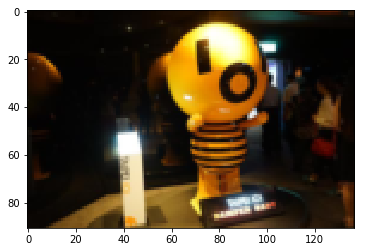

In [46]:
filename = "damper-baby.jpg"
im_orig = getBayer.get_rgb_array(filename)
im_orig = scipy.misc.imresize(im_orig, .25)
plt.imshow(im_orig/255)

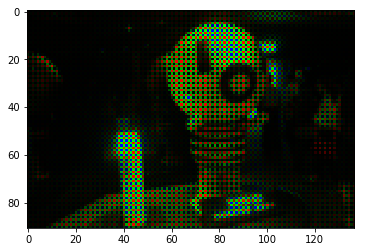

In [47]:

bayer_grid = getBayer.get_bayer_grid(im_orig.shape[1], im_orig.shape[0])
im_bayered = im_orig * bayer_grid
im_bayered = im_bayered/255
plt.imshow(im_bayered)

# ex_bayered = Image.fromarray(im_bayered)
# ex_bayered.save("ex_bayered.jpg")

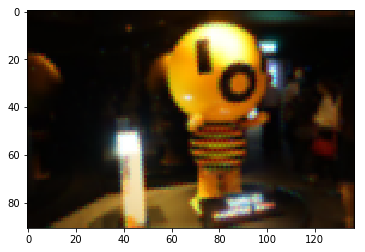

In [70]:
# im_nearest_neighbor = getBayer.debayer_nearest_neighbor(im_bayered)
# this is angry

im_bilinear = getBayer.debayerize(im_bayered)
im_malvar = getBayer.debayer_malvar(im_bayered)

plt.imshow(im_bilinear)


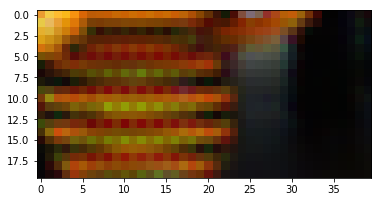

In [63]:
h,w = im_orig[:,:,0].shape
plt.imshow(im_bilinear[h//2:h//2 +20,w//2:w//2 +40,:])

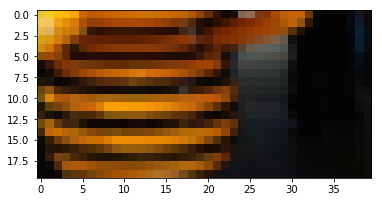

In [64]:
plt.imshow(im_orig[h//2:h//2 +20,w//2:w//2 +40,:])

1.4281862745098042

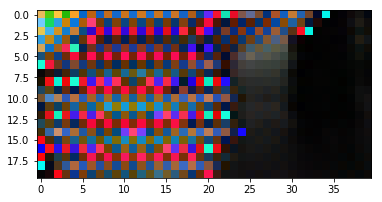

In [76]:

plt.imshow(im_malvar[h//2:h//2 +20,w//2:w//2 +40,:])
np.max(im_malv)


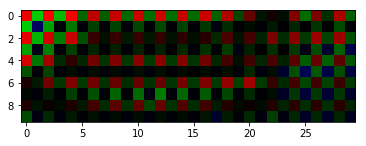

In [67]:
plt.imshow(im_bayered[h//2:h//2 +10,w//2:w//2 +30,:])